In [3]:
from pynq import PL
PL.reset() #important fixes caching issues which have popped up.
import xrfdc #poorly documented library that handles interfacing to the RF data converter
from pynq import Overlay  #import the overlay module
ol = Overlay('./proj_collection.bit')  #locate/point to the bit file
import pprint
pprint.pprint(ol.ip_dict)
dma = ol.axi_dma_0 #might need to change name depending on what you called it
rf = ol.usp_rf_data_converter_0 #might need to change name depending on what you called it
from pynq import Clocks
Clocks.pl_clk0_mhz = 150
print(Clocks.pl_clk0_mhz)

{'axi_dma_0': {'addr_range': 65536,
               'bdtype': None,
               'device': <pynq.pl_server.embedded_device.EmbeddedDevice object at 0xffff97838310>,
               'driver': <class 'pynq.lib.dma.DMA'>,
               'fullpath': 'axi_dma_0',
               'gpio': {},
               'interrupts': {},
               'mem_id': 'S_AXI_LITE',
               'memtype': 'REGISTER',
               'parameters': {'ADDR_WIDTH': '10',
                              'ARUSER_WIDTH': '0',
                              'AWUSER_WIDTH': '0',
                              'BUSER_WIDTH': '0',
                              'CLK_DOMAIN': 'design_1_zynq_ultra_ps_e_0_0_pl_clk0',
                              'C_BASEADDR': '0xA0000000',
                              'C_DLYTMR_RESOLUTION': '125',
                              'C_ENABLE_MULTI_CHANNEL': '0',
                              'C_FAMILY': 'zynquplus',
                              'C_HIGHADDR': '0xA000FFFF',
                          

                                                                                          'Status. '
                                                                                          'Indicates '
                                                                                          'current '
                                                                                          'interrupt '
                                                                                          'threshold '
                                                                                          'value.\n'
                                                                                          'Note: '
                                                                                          'Applicable '
                                                                                          'only '
                                                                                       

                                            'DAC_Data_Type12': '0',
                                            'DAC_Data_Type13': '0',
                                            'DAC_Data_Type20': '0',
                                            'DAC_Data_Type21': '0',
                                            'DAC_Data_Type22': '0',
                                            'DAC_Data_Type23': '0',
                                            'DAC_Data_Type30': '0',
                                            'DAC_Data_Type31': '0',
                                            'DAC_Data_Type32': '0',
                                            'DAC_Data_Type33': '0',
                                            'DAC_Data_Width00': '16',
                                            'DAC_Data_Width01': '16',
                                            'DAC_Data_Width02': '16',
                                            'DAC_Data_Width03': '16',
                                        

                                      'PSU__OCM_BANK0__POWER__ON': '1',
                                      'PSU__OCM_BANK1__POWER__ON': '1',
                                      'PSU__OCM_BANK2__POWER__ON': '1',
                                      'PSU__OCM_BANK3__POWER__ON': '1',
                                      'PSU__OVERRIDE_HPX_QOS': '0',
                                      'PSU__OVERRIDE__BASIC_CLOCK': '0',
                                      'PSU__PCIE__ACS_VIOLAION': '0',
                                      'PSU__PCIE__ACS_VIOLATION': '0',
                                      'PSU__PCIE__AER_CAPABILITY': '0',
                                      'PSU__PCIE__ATOMICOP_EGRESS_BLOCKED': '0',
                                      'PSU__PCIE__BAR0_64BIT': '0',
                                      'PSU__PCIE__BAR0_ENABLE': '0',
                                      'PSU__PCIE__BAR0_PREFETCHABLE': '0',
                                      'PSU__PCIE__BAR0_SCALE': '<

In [4]:
adc_tile = rf.adc_tiles[2]
print(adc_tile)
adc_block = adc_tile.blocks[0]
print(adc_block)
print(adc_block.BlockStatus)
print(adc_block.MixerSettings)
adc_block.Dither = 0 #doesn't really matter for this lab, but let's turn off.
center_frequency = 1 #nothing there. but not zero to help with IQ issue
adc_block.MixerSettings['Freq']= center_frequency # set the frequency of the Numerically controlled oscillator.
adc_block.UpdateEvent(xrfdc.EVENT_MIXER) #every time setting is changed, must call this.
print(adc_block.MixerSettings)


{'SamplingFreq': 4.096, 'AnalogDataPathStatus': 1, 'DigitalDataPathStatus': 897, 'DataPathClocksStatus': 1, 'IsFIFOFlagsEnabled': 3, 'IsFIFOFlagsAsserted': 0}
{'Freq': 0.0, 'PhaseOffset': 0.0, 'EventSource': 2, 'CoarseMixFreq': 16, 'MixerMode': 3, 'FineMixerScale': 0, 'MixerType': 2}
{'Freq': 1.0, 'PhaseOffset': 0.0, 'EventSource': 2, 'CoarseMixFreq': 0, 'MixerMode': 3, 'FineMixerScale': 0, 'MixerType': 2}


In [8]:
import numpy as np
import time
%matplotlib notebook
import matplotlib.pyplot as plt
from pynq import allocate

def plot_to_notebook(time_sec,in_signal,n_samples,):
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.xlabel('Time (usec)')
    plt.grid()
    plt.plot(time_sec[:n_samples]*1e6,in_signal[:n_samples],'y-o',label='Input signal')
    #plt.plot(time_sec[:n_samples]*1e6,in_signal[:n_samples],'y-o',label='Input signal')

    plt.legend()
def iq_plot(time_sec,re_signal,im_signal,n_samples,):
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.xlabel('Time (usec)')
    plt.grid()
    plt.plot(time_sec[:n_samples],re_signal[:n_samples],'y-o',label='I signal')
    plt.plot(time_sec[:n_samples],im_signal[:n_samples],'g-o',label='Q signal')
    #plt.plot(time_sec[:n_samples]*1e6,in_signal[:n_samples],'y-o',label='Input signal')

    plt.legend()

def plot_fft(samples,in_signal,n_samples,):
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.xlabel('Frequency')
    plt.grid()
    plt.plot(samples[:n_samples],in_signal[:n_samples],'y-',label='Signal')
    #plt.plot(time_sec[:n_samples]*1e6,in_signal[:n_samples],'y-',label='Signal')
    plt.legend()

{'Freq': 1575.4199999999983, 'PhaseOffset': 0.0, 'EventSource': 2, 'CoarseMixFreq': 0, 'MixerMode': 3, 'FineMixerScale': 0, 'MixerType': 2}
Hardware execution time:  0.08244919776916504
[    0 65535 65535 ...     0     0     0]
[0, -1, -1, -2, -1, -4, -4, -2, -2, -1, -3, -2, -1, 0, -1, -2, -1, 0, 1, 2, 0, -2, -2, -1, 0, -1, 0, 0, 0, -1, -1, 0, 0, -3, -1, 1, 1, 0, 0, -1, 0, -1, 0, -1, -1, -1, -1, 1, 2, 0, 0, 2, 1, 2, 1, -1, 0, 0, -2, -2, -2, -1, 0, -1, -1, -1, -2, -2, -2, -1, 0, 0, 1, 0, -1, 0, 0, -1, -1, 1, 1, 0, 0, 0, -1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, -1, -1, -2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<IPython.core.display.Javascript object>


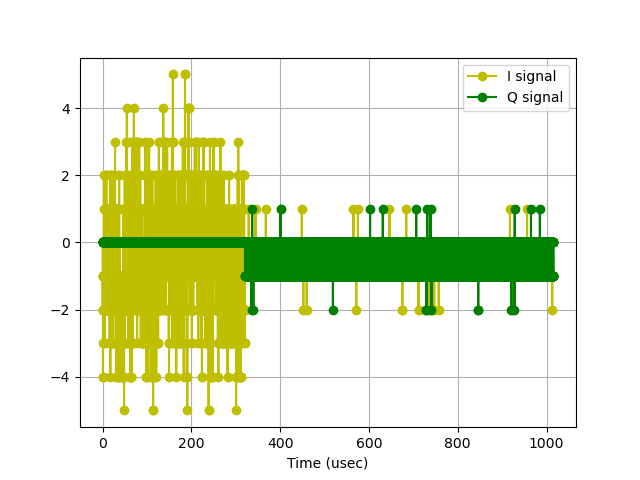

<IPython.core.display.Javascript object>


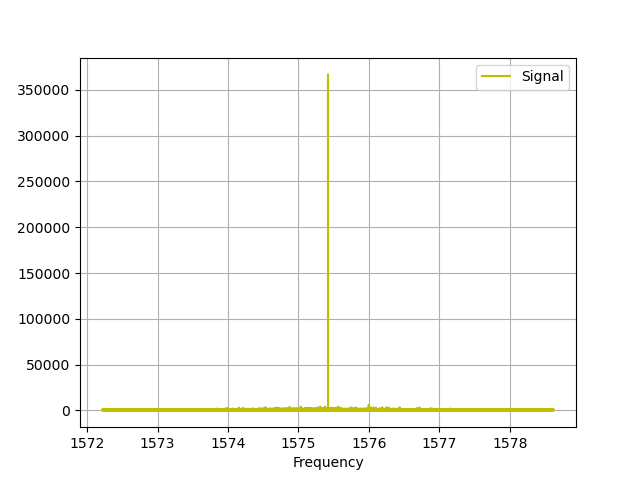

In [9]:
#WITH STANDARD FREQUENCY (and connected)
center_frequency = 1575.42
adc_block.MixerSettings['Freq']= center_frequency # set the frequency of the Numerically controlled oscillator.
adc_block.UpdateEvent(xrfdc.EVENT_MIXER) #every time setting is changed, must call this.
print(adc_block.MixerSettings)

# Sampling frequency
fs = 6.4
# Number of samples
n = 2**19
T = n/fs

down_from_center = center_frequency - fs/2
up_from_center = center_frequency + fs/2
# Time vector in seconds
t = np.linspace(0, T, n, endpoint=False)
# Allocate buffers for the input and output signals
ns = np.linspace(down_from_center, up_from_center,n,endpoint=False)

out_buffer = allocate(2*n, dtype=np.int32)
# Trigger the DMA transfer and wait for the result
start_time = time.time()
dma.recvchannel.transfer(out_buffer)
dma.recvchannel.wait()
stop_time = time.time()
hw_exec_time = stop_time-start_time
print('Hardware execution time: ',hw_exec_time)

real = []
imag = []
#extract the two values (I and Q) from each 32 bit write from the hardware side.
print(out_buffer)
for i in range(n):
    val = out_buffer[i]&0xFFFF
    if val>=32768:
        real.append(np.int32(0xFFFF0000|val))
    else:
        real.append(val)
    imag.append((out_buffer[i]>>16))
print(real[:100])
print(imag[:100])

# plot_to_notebook(t,real,6500)
# plot_to_notebook(t,imag,6500)
iq_plot(t,real,imag,6500)
#i flipped my real/imag I think and was lazy so fixed here
c_data = 1j*np.array(real) + np.array(imag)
z = np.fft.fftshift(np.fft.fft(c_data, n))
plot_fft(ns,abs(z), n)
out_buffer.close()

In [5]:
#convert signed integer into byte
def int_to_byte(x: int):
    if x<0:
        x += 256
    return x.to_bytes(1, 'big')

#int_to_byte(-20)

In [12]:
#realhalf = [val//2 for val in real]
#imaghalf = [val//2 for val in imag]
#print(realhalf[0:100],imaghalf[0:100])
print(max(real),max(imag))

49 53


In [13]:
#convert into a .dat file??
output = []
for i in range(len(real)):
    I = int(real[i])
    Q = int(imag[i])
    output.append(int_to_byte(I))
    output.append(int_to_byte(Q))

out_bytes = b"".join(output)
#print(output)
with open("out-1203-6.4-1.dat","wb") as z:
    z.write(out_bytes)

print("Length", len(realhalf))
print("Output complete.")

Length 524288
Output complete.


In [6]:
def save_data(samples, filename):
    #samples is number of samples
    #at most 2**19
    out_buffer = allocate(2*n, dtype=np.int32)
    dma.recvchannel.transfer(out_buffer)
    dma.recvchannel.wait()
    
    real = []
    imag = []
    #extract the two values (I and Q) from each 32 bit write from the hardware side.
    print(out_buffer)
    for i in range(samples):
        val = out_buffer[i]&0xFFFF
        if val>=32768:
            real.append(np.int32(0xFFFF0000|val))
        else:
            real.append(val)
        imag.append((out_buffer[i]>>16))
    
    output = []
    for i in range(len(real)):
        I = int(real[i])
        Q = int(imag[i])
        output.append(int_to_byte(I))
        output.append(int_to_byte(Q))
        

    out_bytes = b"".join(output)
    #print(output)
    with open(filename,"wb") as z:
        z.write(out_bytes)

In [7]:
save_data(2**16,"test.dat")

NameError: name 'allocate' is not defined